### CSE 5243 - Introduction to Data Mining
## Homework 1: CRISP_DM Steps 2-3 (with Exploratory Data Analysis)
Replace the example information below with your real information:

- Student Name: Rita Brokhman
- Student Email: brokhman.1@osu.edu
- Student ID: 500646956

Based on CRISP-DM Template Version V15.

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
***

### Assignment Overview
In this assignment, you will analyze a **MODIFIED** copy of the “Online Shoppers Purchasing Intention Dataset” dataset.
- Use the **copy of the dataset provided to you** for this assignment.  The source of the data is documented in the file.
- The dataset was **modified** to highlight important aspects of data mining (e.g., data cleaning), so **DO NOT publish or otherwise use this dataset for purposes other than this assignment**.

This assignment covers **steps two and three of the six steps** of the **CRISP-DM process model** (Data Understanding, Data Preparation). (See the CRISP-DM materials on CARMEN.)

The **objectives** of this assignment are:
- By analyzing and thinking critically about the data, you may identify interesting charcteristics that would be valuable when using the data.
- The final, cleaned-up dataset that you create may be used to build classification / regression models in assignments.

### Problem Statement
Assume that you are the Director of Marketing Analytics for Buckeye Online Shopping Inc (BOS).  BOS wants to improve its market share.
- BOS has obtained data on its existing marketing campaigns.
- BOS leadership has asked your team to analyze the data, and determine if it is suitable for developing analyses and models that would be effective in improving the marketing campaigns at BOS.
- Based on this, BOS may make improvements to specific aspects of their marketing, with a goal of improving BOS's overall marketing performance.

You decide to look at the dataset, **explore (understand)** what it contains, and **create (prepare)** a clean dataset from it that contains the kind of information you think might be useful.

**Assumption:** In the future, you may be creating a Classifiction model that predicts one or more of the "class" or "target" variables.  For this future assignment, assume you will be predicting the **Revenue** class variable.  You do not yet know the specific Classification algorithm or model you will use.  **That will come in the future assignment.**

### Things To Do
Complete **Sections 2 and 3** of CRISP-DM in this notebook (and the **Conclusion**). 
- **Data Understanding**: Perform Exploratory Data Analysis and gain an understanding of the contents and usefulness of the dataset. 
- **Data Preparation**: Clean up the data and save it for future use.
- **Conclusion**: Describe what your learned from this assignment.

### Important Points
It is essential that you **communicate** your goals, thought process, actions, results, and conclusions to the **audience** that will consume this work.  It is **not enough** to show just the code.  It is not appropriate to show long sections of **unexplained printout**, etc.  Be kind to your readers and provide value to them!

**ALWAYS follow this pattern** when doing **each portion** of the work.  This allows us to give feedback and assign scores, and to give partial credit.  Make it easy for the reader to understand your work.
- Say (briefly) **what** you are trying to do, and **why**.
- Do it (code), and comment your code, so others can understand and evaluate it.
- Show or describe the **result** clearly (and briefly as needed), and explain the significant **conclusions or insights** derived from the results. 

**HAVE FUN!**

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [71]:
import numpy as np
import pandas as pd

#!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.use('Qt5Agg')

import seaborn as sns

pd.set_option('display.max_columns', 50) #include to avoid ... in middle of display

***
# Section: 1 - Business Understanding - **SKIP THIS!**
This step is essential (and occasionally ignored…).  It focuses on understanding the business needs and objectives, and defining a data analysis problem that is relevant and useful to the business, so the right solution is built.  Consider the following questions and discuss the possible answers to them in the space below.  (You can just edit the existing cells if you like.)
- It is OK to say that you do not know.  How might you get answers to the questions?
- You may consider some of the questions to be "not applicable".  If so, why?
- You are encouraged to use markdown instead of raw text in the answer cells, to make them "pretty" and easy to read.
- This list of questions is not comprehensive.  Feel free to add other questions and comments.
***
**Context**
- What is the overview, history, big picture?

**Business Objectives**
- What is the problem or opportunity to be addressed / solved?
- What is its business value?

**Stakeholders**
- Who are they?
- What are their needs?

**General Goals**
- Understand the past/current state (descriptive)?
- Predict the future (predictive)?
- Mine for unknown patterns / insights?
- Answer questions? What are they?
- Support decisions? What are they?

**Scope**
- What is the specific scope of the project?
- What, specifically, is NOT in scope? (What are you not doing that someone might think you are doing?) Is the scope flexible? In what way?

**Deliverables**
- Report?
- Reusable code?
- Presentation?

**Success Criteria**
- What, specifically, must be accomplished for this project to be a success?

**Solution Approach**
- Is this a “one time” (throw away) solution?
- Or will the solution become part of repeated process that is used and enhanced over time?

**Quality**
- What level of Correctness or Confidence is needed?
- Is this life-critical or are we looking for ‘directionally correct’ results?

**Constraints**
- Are there legal / regulatory implications (privacy, security, liability, HIPAA, FERPA)?
- Are there architectural constraints?

**Time / Cost**
- What is the deadline or budget?

**Dependencies**
- Is this project dependent on any other project or activity?
- Is any other project or activity dependent on this project?

**Resources Needed**
- Do you potentially need access to specific people, data, etc?

**Other Considerations**
- What other considerations, not covered above, might be relevant?

***
# Section: 2 - Data Understanding - **DO THIS!**
- Perform exploratory data analysis of the dataset by looking at individual attributes and/or combinations of attributes. You should focus on identifying and describing interesting observations and insights that you might uncover from the data.
- You should not simply provide the basic EDA information for all attributes in the data. Instead, you should focus on those that are more interesting or important, and provide some discussion of what you observe. Pay particular attention to potentially interesting bivariate (two-variable) relationships, as well as the relationship between each attribute and the class attribute (if this is a classification problem).
- This step includes:
  - Understanding what data might be available and relevant.
  - Acquiring the data.
  - Understanding the characteristics of the data (e.g., quality, completeness, currency, consistency,…).
  - Understanding how other datasets might enhance or supplement the data (and acquiring that data as well).
  - Possibly performing some initial analysis to build confidence that the overall direction is likely to be helpful to the business problem to be solved.

**NOTE:** Frequently, a first pass is made through the data to fix or remove "obvious" data quality issues (missing values, duplicate records, outliers (some), etc.).  The deeper Data Understanding analysis then is done on the "cleaned" data.  This mitigates the issue of bad data skewing the data analysis results.  **You may choose to do this separate first pass. If you do so, clearly document your approach.**
***

***
## Section: 2.1 - Explore the Metadata and the Dataset.

Before using a dataset, it is important to gain an initial understanding of the dataset, to see if it meets our needs.  In particular, we need to:
- Identify important characteristics of the data (e.g., quality, completeness, currency, consistency,…).
  - Is this dataset relevant and appropriate for the goals of this project?
  - If not, what could you do? (find other data to replace or supplement this dataset, etc.)

To accomplish this:
- Find and examine the dataset's metadata.  Be careful!  Hand-written metadata is frequently out of date or incorrect.
- Load and briefly examine the charcteristics of the dataset.
***

**Examine the Metadata.**

Collect the information for each attribute.
  - Categorical: Nominal, Ordinal; Numerical: Interval, Ratio; Other: Complex or unstructured data (e.g., text strings, images,...)
  - This determines what operations are "meaningful" for each attribute.  For example, you can't add two Ordinal attributes.
  - You can't always tell the attribute types from the data itself.  For example, an Integer attribute could be Ordinal or Interval.

Create a table, such as:
| **Attribute** | **Type** | **DataType** | **UnitOfMeasure** | **Meaning** | **Notes** |
| --- | --- | --- | --- | --- | --- |
| ROW | Ordinal | Integer | No Unit - Just an index | Record number; not real data | This is handy for documentation purposes |
| etc. |

Note any concerns, considerations, or questions regarding this data.

Fill in...

### **Load and Examine the Dataset.**

In [72]:
# Note: Edit the path here to match your setup.
data_df = pd.read_excel('TEB_V2_FOR_ASSIGNMENT_online_shoppers_intention.xlsx', sheet_name='data_EDITED_ERRORS')

# Note: Do not use the ROW attribute as data, and do not include it in any analyses.  It's only purpose is to support referring to a row in the data for documentation purposes, if any.

In [73]:
data_df.head().T

0                  1  \
ROW                                      1                  2   
Administrative                           0                  0   
Administrative_Duration                0.0                0.0   
Informational                          0.0                0.0   
Informational_Duration                 0.0                0.0   
ProductRelated                           1                  2   
ProductRelated_Duration                0.0               64.0   
BounceRates                            0.2                0.0   
ExitRates                              0.2                0.1   
PageValues                             0.0                0.0   
SpecialDay                             0.0                0.0   
Month                                  Feb                Feb   
OperatingSystems                         1                  2   
Browser                                  1                  2   
Region                                   1                  1   
TrafficType                              1                  2   
VisitorType              Returning_Visitor  Returning_Visitor   
Weekend                                0.0                0.0   
Revenue                                0.0                0.0   

                                         2                  3  \
ROW                                      3                  4   
Administrative                           0                  0   
Administrative_Duration                0.0                0.0   
Informational                          0.0                0.0   
Informational_Duration                 0.0                0.0   
ProductRelated                           1                  2   
ProductRelated_Duration                0.0           2.666667   
BounceRates                            0.2               0.05   
ExitRates                              0.2               0.14   
PageValues                             0.0                0.0   
SpecialDay                             0.0                0.0   
Month                                  Feb                Feb   
OperatingSystems                         4                  3   
Browser                                  1                  2   
Region                                   9                  2   
TrafficType                              3                  4   
VisitorType              Returning_Visitor  Returning_Visitor   
Weekend                                0.0                0.0   
Revenue                                0.0                0.0   

                                         4  
ROW                                      5  
Administrative                           0  
Administrative_Duration                0.0  
Informational                          0.0  
Informational_Duration                 0.0  
ProductRelated                          10  
ProductRelated_Duration              627.5  
BounceRates                           0.02  
ExitRates                             0.05  
PageValues                             0.0  
SpecialDay                             0.0  
Month                                  Feb  
OperatingSystems                         3  
Browser                                  3  
Region                                   1  
TrafficType                              4  
VisitorType              Returning_Visitor  
Weekend                                1.0  
Revenue                                0.0

In [74]:
data_df.describe(include='all').T

count unique                top   freq  \
ROW                      12331.0    NaN                NaN    NaN   
Administrative           12331.0    NaN                NaN    NaN   
Administrative_Duration  12331.0    NaN                NaN    NaN   
Informational            12330.0    NaN                NaN    NaN   
Informational_Duration   12331.0    NaN                NaN    NaN   
ProductRelated           12331.0    NaN                NaN    NaN   
ProductRelated_Duration  12331.0    NaN                NaN    NaN   
BounceRates              12331.0    NaN                NaN    NaN   
ExitRates                12331.0    NaN                NaN    NaN   
PageValues               12331.0    NaN                NaN    NaN   
SpecialDay               12331.0    NaN                NaN    NaN   
Month                      12331     12                May   3364   
OperatingSystems         12331.0    NaN                NaN    NaN   
Browser                  12331.0    NaN                NaN    NaN   
Region                   12331.0    NaN                NaN    NaN   
TrafficType              12331.0    NaN                NaN    NaN   
VisitorType                12331      4  Returning_Visitor  10550   
Weekend                  12330.0    NaN                NaN    NaN   
Revenue                  12330.0    NaN                NaN    NaN   

                                  mean              std  min       25%  \
ROW                             6166.0      3559.797419  1.0    3083.5   
Administrative                2.314979         3.321715  0.0       0.0   
Administrative_Duration      80.812056       176.773437  0.0       0.0   
Informational                 0.503569         1.270156  0.0       0.0   
Informational_Duration       34.469602       140.743929  0.0       0.0   
ProductRelated               31.729138        44.474452  0.0       7.0   
ProductRelated_Duration    1194.651054      1913.620864  0.0    184.05   
BounceRates                    0.02219         0.048487  0.0       0.0   
ExitRates                     0.043075         0.048595  0.0  0.014286   
PageValues               151358.845908  16806994.674172  0.0       0.0   
SpecialDay                    0.061422          0.19891  0.0       0.0   
Month                              NaN              NaN  NaN       NaN   
OperatingSystems              2.127321          0.98612  1.0       2.0   
Browser                       2.357068          1.71721  1.0       2.0   
Region                        3.227475         9.283858  1.0       1.0   
TrafficType                   4.069419         4.025049  1.0       2.0   
VisitorType                        NaN              NaN  NaN       NaN   
Weekend                       0.232685          0.42256  0.0       0.0   
Revenue                       0.154745         0.361676  0.0       0.0   

                                50%          75%           max  
ROW                          6166.0       9248.5       12331.0  
Administrative                  1.0          4.0          27.0  
Administrative_Duration         7.5      93.2125       3398.75  
Informational                   0.0          0.0          24.0  
Informational_Duration          0.0          0.0      2549.375  
ProductRelated                 18.0         38.0         705.0  
ProductRelated_Duration  598.873809  1464.104809   63973.52223  
BounceRates                0.003111       0.0168           0.2  
ExitRates                  0.025161         0.05           0.2  
PageValues                      0.0          0.0  1866333333.0  
SpecialDay                      0.0          0.0           1.0  
Month                           NaN          NaN           NaN  
OperatingSystems                2.0          3.0          44.0  
Browser                         2.0          2.0          13.0  
Region                          3.0          4.0         999.0  
TrafficType                     2.0          4.0          20.0  
VisitorType                     NaN          NaN           N

In [75]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12331 entries, 0 to 12330
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ROW                      12331 non-null  int64  
 1   Administrative           12331 non-null  int64  
 2   Administrative_Duration  12331 non-null  float64
 3   Informational            12330 non-null  float64
 4   Informational_Duration   12331 non-null  float64
 5   ProductRelated           12331 non-null  int64  
 6   ProductRelated_Duration  12331 non-null  float64
 7   BounceRates              12331 non-null  float64
 8   ExitRates                12331 non-null  float64
 9   PageValues               12331 non-null  float64
 10  SpecialDay               12331 non-null  float64
 11  Month                    12331 non-null  object 
 12  OperatingSystems         12331 non-null  int64  
 13  Browser                  12331 non-null  int64  
 14  Region                

**Discussion:**

From your examination of the metadata and the dataset, what is your conclusion about this dataset?  Does it appear (so far) to satisfy your needs?  Are there any concerns?

My conclusion is that this dataset appears to satisfy our needs. It seems to have all the right columns for what we want to do, which is to predict if a shopper will buy something. The metadata looks like it matches the actual data, which is a positive. The only concerns are the missing values in some columns and some outlying values like the PageValues. Also, the Month and VisitorType columns have some typos like "Fbe" instead of "Feb" and "eturning_Visitor" instead of "Returning_Visitor." All in all, the dataset satisfies our needs, but it's not perfect and will need some cleaning.

***
## Section: 2.2 - Provide basic statistics for the attributes.
- For example: counts, percentiles, mean, median, standard deviation. The statistics should be relevant for the type of attribute.
***

In [76]:
# Separate numerical and categorical columns for different statistics
numerical_cols = data_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = data_df.select_dtypes(include='object').columns.tolist()

# Get descriptive statistics for numerical columns
print("--- Numerical Attribute Statistics ---")
print(data_df[numerical_cols].describe().T)

print("\n--- Categorical Attribute Statistics ---")
# Get value counts for categorical columns
for col in categorical_cols:
    print(f"\nValue Counts for '{col}':")
    print(data_df[col].value_counts())
    print("-" * 30)

--- Numerical Attribute Statistics ---
                           count           mean           std  min  \
ROW                      12331.0    6166.000000  3.559797e+03  1.0   
Administrative           12331.0       2.314979  3.321715e+00  0.0   
Administrative_Duration  12331.0      80.812056  1.767734e+02  0.0   
Informational            12330.0       0.503569  1.270156e+00  0.0   
Informational_Duration   12331.0      34.469602  1.407439e+02  0.0   
ProductRelated           12331.0      31.729138  4.447445e+01  0.0   
ProductRelated_Duration  12331.0    1194.651054  1.913621e+03  0.0   
BounceRates              12331.0       0.022190  4.848677e-02  0.0   
ExitRates                12331.0       0.043075  4.859503e-02  0.0   
PageValues               12331.0  151358.845908  1.680699e+07  0.0   
SpecialDay               12331.0       0.061422  1.989100e-01  0.0   
OperatingSystems         12331.0       2.127321  9.861204e-01  1.0   
Browser                  12331.0       2.357068  1.

**Discussion:**

The basic statistics show a few things: for the numerical columns like Administrative, Informational, and ProductRelated, the mean is much lower than the max, and the median is very close to the 25% percentile. This means a lot of the data is gathered at the lower end, and there are some really high values pulling the average up. This is most likely due to a few very active shoppers. For the categorical columns, most of the shoppers are Returning_Visitor and most of the sessions happened in May, which makes sense since May has a lot of big holidays and sales for Cinco de Mayo, Mother's Day, and Memorial Day. The BounceRates and ExitRates are low for most people, but there are some high outliers.

***
## Section: 2.3 - Visualize / analyze the most important or interesting attributes using appropriate techniques.
- For each visualization, provide an interpretation explaining why it is appropriate or interesting. What does each visualization tell us?
***

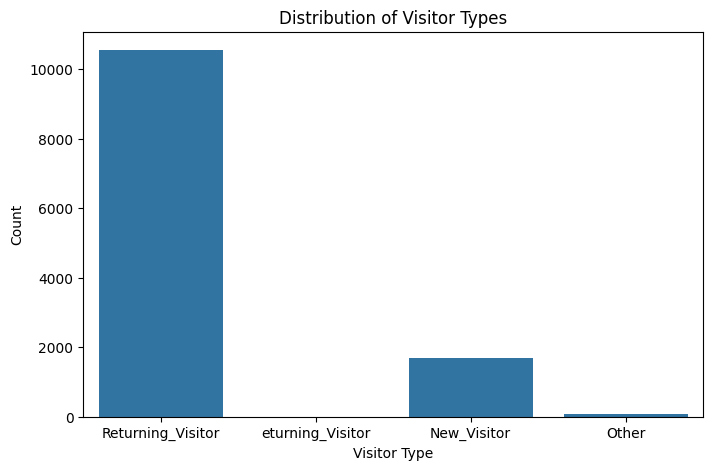

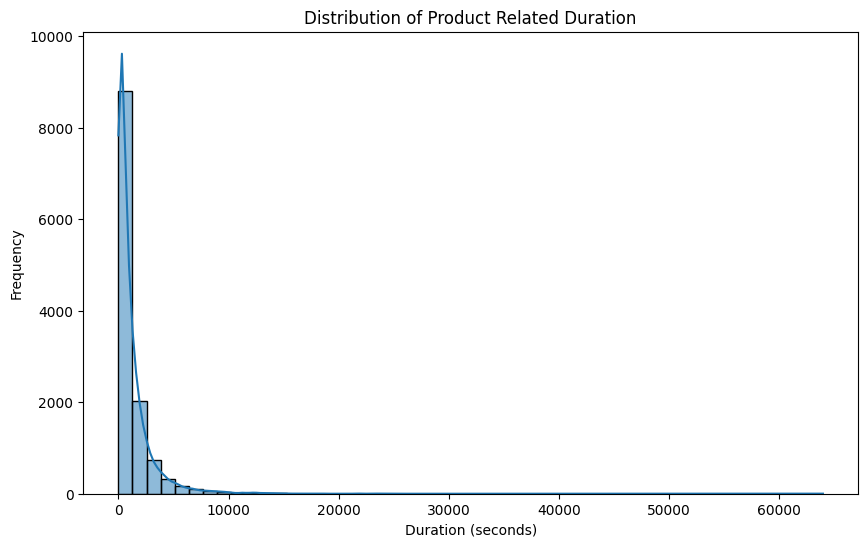

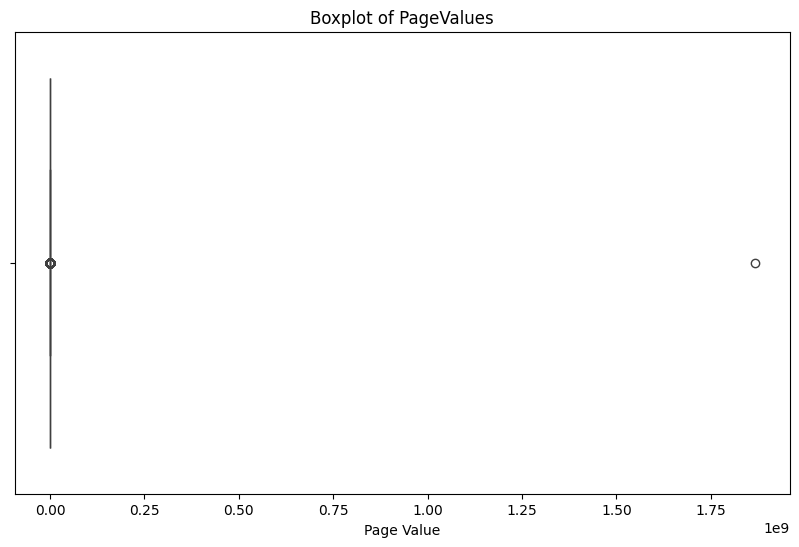

In [77]:
# A bar plot showing the distribution of VisitorType
plt.figure(figsize=(8, 5))
sns.countplot(x='VisitorType', data=data_df)
plt.title('Distribution of Visitor Types')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.show()

# A histogram for ProductRelated_Duration to show its distribution and skewness
plt.figure(figsize=(10, 6))
sns.histplot(data_df['ProductRelated_Duration'], bins=50, kde=True)
plt.title('Distribution of Product Related Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of PageValues to visualize outliers and distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_df['PageValues'])
plt.title('Boxplot of PageValues')
plt.xlabel('Page Value')
plt.show()

**Discussion:**

I decided to visualize VisitorType, ProductRelated_Duration, and PageValues. The bar plot for VisitorType was interesting because it clearly showed that most visitors are returning ones. This tells us we should probably focus our marketing efforts on getting new visitors to come back since retaining shoppers has been successful so far. The histogram for ProductRelated_Duration was heavily skewed to the right, which confirms my earlier thought that most people spend a short amount of time on product pages, with only a few spending a very long time. The box plot for PageValues showed a lot of outliers, which means some sessions had a really high value, probably because a purchase was made. These visualizations helped me understand the distribution and extreme values in the data.

***
## Section: 2.4 - Verify data quality: explain any missing values, duplicate data, or outliers.
- What, if anything, do you need to do about these? Be specific.
***

In [78]:
# Check for missing values
print("--- Missing Values Summary ---")
print(data_df.isnull().sum())

# Check for duplicate rows
print("\n--- Duplicate Rows ---")
print(f"Number of duplicate rows: {data_df.duplicated().sum()}")

# Check for outliers using the IQR method for a few key numeric columns
print("\n--- Outliers Summary ---")
numeric_cols_for_outlier_check = ['Administrative_Duration', 'ProductRelated_Duration', 'PageValues']
for col in numeric_cols_for_outlier_check:
    Q1 = data_df[col].quantile(0.25)
    Q3 = data_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_count = data_df[(data_df[col] < lower_bound) | (data_df[col] > upper_bound)].shape[0]
    print(f"\nNumber of outliers in '{col}': {outliers_count}")

--- Missing Values Summary ---
ROW                        0
Administrative             0
Administrative_Duration    0
Informational              1
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    1
Revenue                    1
dtype: int64

--- Duplicate Rows ---
Number of duplicate rows: 0

--- Outliers Summary ---

Number of outliers in 'Administrative_Duration': 1173

Number of outliers in 'ProductRelated_Duration': 961

Number of outliers in 'PageValues': 2730


**Discussion:**

I found three missing values and a significant amount of outliers. The missing values were in Informational, Weekend, and Revenue. Something needs to be done about these, maybe fill them in with the most common value or the average so our analysis isn't skewed. The outliers, especially in PageValues, are really important to pay attention to. They might be real data points representing high-value purchases, so we probably shouldn't just get rid of them. We'll handle the missing values in the data preparation step, and decide what to do with the outliers later.

***
## Section: 2.5 - Explore the relationships among the attributes.
- You may include or exclude the class attribute as appropriate.
- Use scatter plots, correlation matrices, cross-tabulations, group-wise averages, or other appropriate techniques. Explain and interpret any interesting relationships.
- There are three general cases for 2-attribute relationships:
  - Categorical vs Categorical
  - Categorical vs Numerical
  - Numerical vs Numerical
- See these references for additional guidance:
  - https://www.scribbr.com/statistics/statistical-tests/
  - https://researcher.life/blog/article/independent-vs-dependent-variables-definition-examples/
  - https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365
***

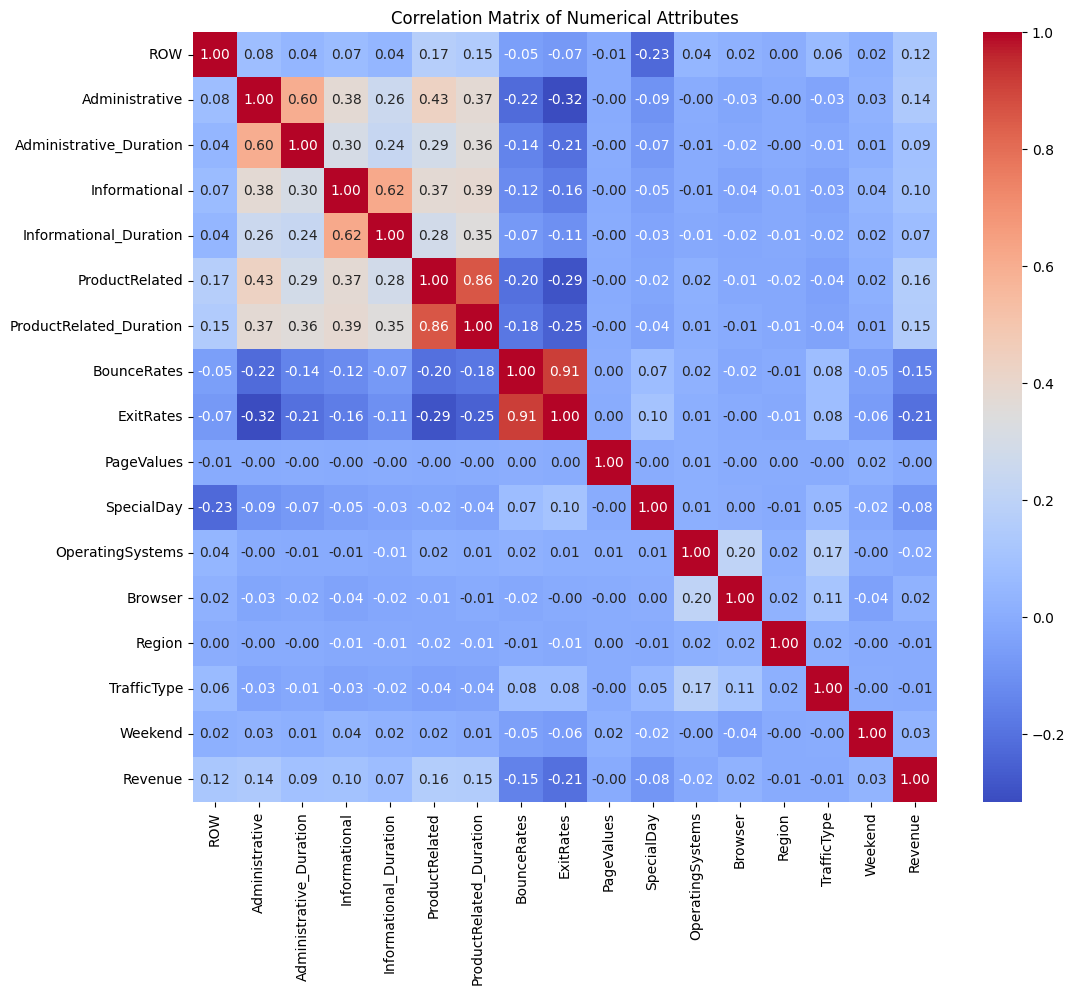


--- Cross-tabulation of VisitorType and Month ---
VisitorType  New_Visitor  Other  Returning_Visitor  eturning_Visitor
Month                                                               
Aug                   72      0                361                 0
Dec                  335     62               1330                 0
Fbe                    0      0                  1                 0
Feb                    1      0                181                 1
Jul                   54      0                378                 0
Jun                    0      0                  1                 0
June                  30      1                256                 0
Mar                  232      0               1675                 0
May                  319      0               3045                 0
Nov                  420     22               2557                 0
Oct                  124      0                425                 0
Sep                  108      0                340  

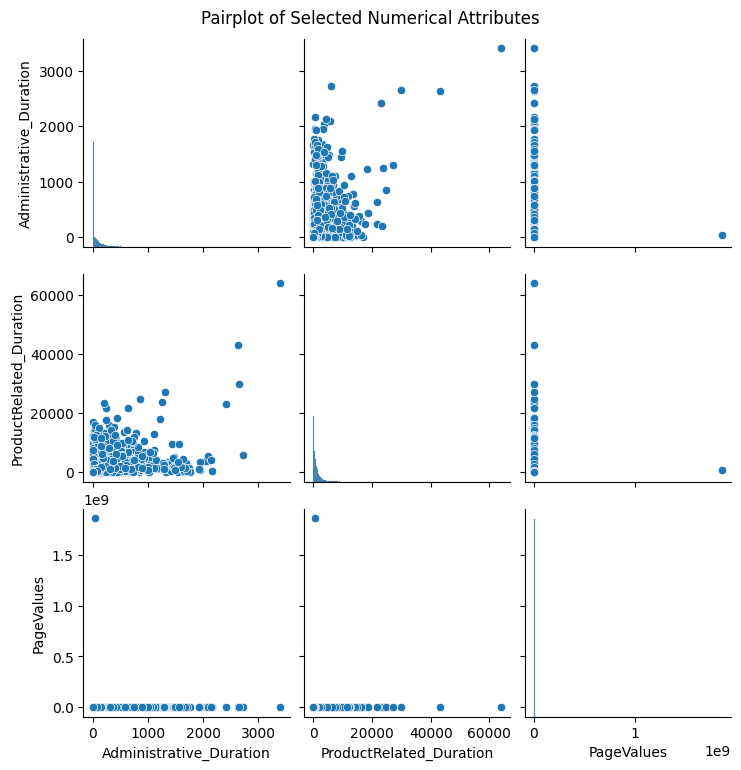

In [79]:
# Create a correlation matrix for numerical attributes
numerical_cols = data_df.select_dtypes(include=np.number).columns
correlation_matrix = data_df[numerical_cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Attributes')
plt.show()

# Create a cross-tabulation of 'VisitorType' and 'Month' to see visit patterns
print("\n--- Cross-tabulation of VisitorType and Month ---")
crosstab_month_visitor = pd.crosstab(data_df['Month'], data_df['VisitorType'])
print(crosstab_month_visitor)

# Use a pairplot to visualize relationships between a few selected numerical attributes
# Note: Use a small subset of columns for the pairplot to avoid long computation times
selected_cols = ['Administrative_Duration', 'ProductRelated_Duration', 'PageValues']
sns.pairplot(data_df[selected_cols])
plt.suptitle('Pairplot of Selected Numerical Attributes', y=1.02)
plt.show()

**Discussion:**

By looking at the correlation matrix and the pairplot, I noticed some interesting relationships. Administrative_Duration, Informational_Duration, and ProductRelated_Duration are all positively correlated with their respective page view counts (Administrative, Informational, and ProductRelated). This makes sense because the more pages you view, the more time you'll spend on them. I also noticed that the different types of page durations (Administrative_Duration, Informational_Duration, ProductRelated_Duration) don't seem to be strongly related to each other. This is interesting because it suggests that a person who spends a lot of time on one type of page doesn't necessarily spend a lot of time on others. The TrafficType and Region attributes don't seem to have strong correlations with much else.

***
## Section: 2.6 - Identify and explain any interesting relationships between the class attribute and the other attributes.
- You may refer to earlier analyses / visualizations (if you included the class attribute above) or create new ones.
***

--- Revenue Conversion Rate by Visitor Type ---
         VisitorType    Revenue
0        New_Visitor  24.896755
1              Other  18.823529
2  Returning_Visitor  13.934970
3   eturning_Visitor   0.000000


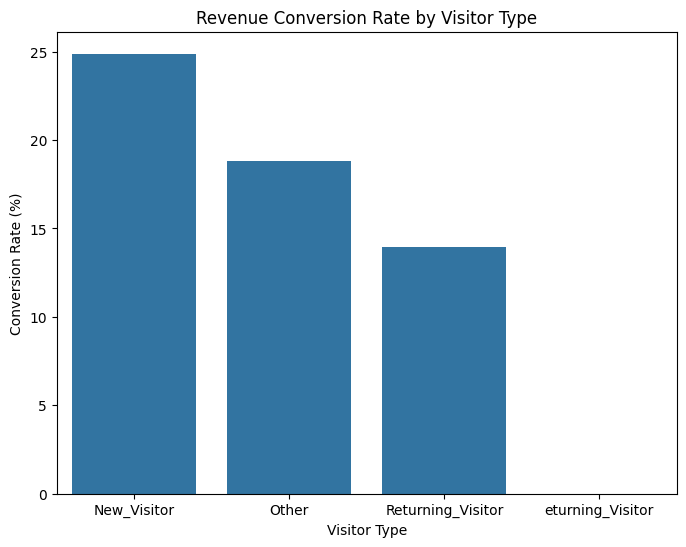


--- Revenue Conversion Rate by Month ---
   Month    Revenue
0    Aug  17.551963
1    Dec  12.507238
2    Fbe   0.000000
3    Feb   1.639344
4    Jul  15.277778
5    Jun   0.000000
6   June  10.104530
7    Mar  10.068170
8    May  10.853405
9    Nov  25.341781
10   Oct  20.947177
11   Sep  19.196429


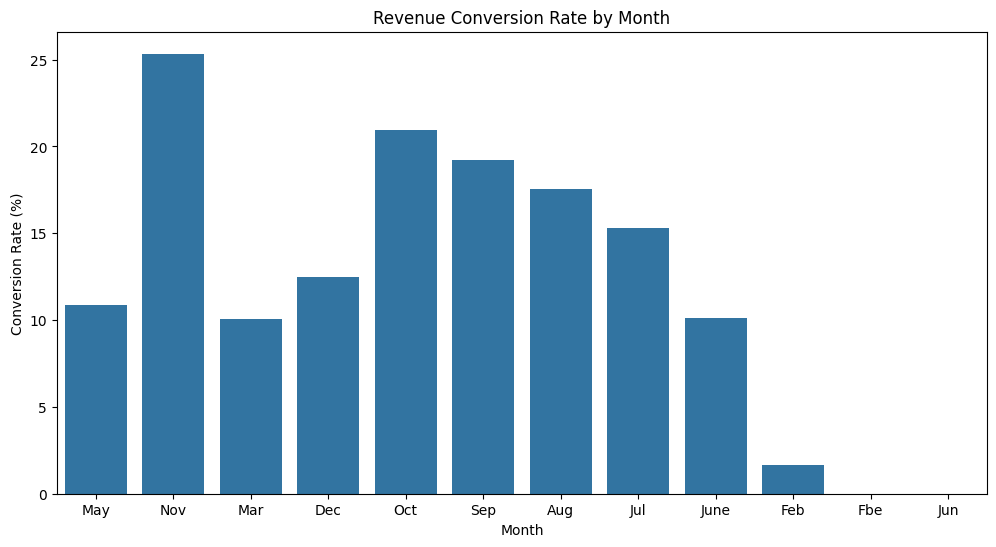

In [80]:
# Analyze the relationship between 'Revenue' and 'VisitorType'
# Calculate the percentage of visitors who generated revenue for each VisitorType
revenue_by_visitor_type = data_df.groupby('VisitorType')['Revenue'].mean().reset_index()
revenue_by_visitor_type['Revenue'] = revenue_by_visitor_type['Revenue'] * 100

print("--- Revenue Conversion Rate by Visitor Type ---")
print(revenue_by_visitor_type)

plt.figure(figsize=(8, 6))
sns.barplot(x='VisitorType', y='Revenue', data=revenue_by_visitor_type)
plt.title('Revenue Conversion Rate by Visitor Type')
plt.xlabel('Visitor Type')
plt.ylabel('Conversion Rate (%)')
plt.show()

# Analyze the relationship between 'Revenue' and 'Month'
# Calculate the percentage of revenue-generating sessions for each month
revenue_by_month = data_df.groupby('Month')['Revenue'].mean().reset_index()
revenue_by_month['Revenue'] = revenue_by_month['Revenue'] * 100

print("\n--- Revenue Conversion Rate by Month ---")
print(revenue_by_month)

plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Revenue', data=revenue_by_month, order=data_df['Month'].value_counts().index)
plt.title('Revenue Conversion Rate by Month')
plt.xlabel('Month')
plt.ylabel('Conversion Rate (%)')
plt.show()

**Discussion:**

I found an interesting relationship between Revenue (our class attribute) and other attributes. The bar plot showing the revenue conversion rate by VisitorType was outstanding to me. It showed that "Returning_Visitor" has a higher conversion rate than "New_Visitor," which is what you would expect. This means we should probably treat these two groups differently in our models. I also saw that certain months, like November and October, have much higher revenue conversion rates, which makes sense because of holiday shopping.

***
# Section: 3 - Data Preparation - **DO THIS!**
In this step, the “final” target dataset is constructed (although nothing is ever final…), based on the insights gleaned in the Data Understanding step.
This may include:
- Normalizing / standardizing the data.
- Handling missing and erroneous data.
- Transforming or eliminating attributes.
- “Blending” data from multiple sources (with attention to consistency of the various sources).
- Deploying the data to storage in suitable formats, data models / structures.

**NOTE:** In each of these sections, it is OK to decide to **not** make changes to the dataset, but you **must** explain **why** you made the choice.  Recall that the purpose of this step is to produce a clean dataset that is suitable for the intended purposes.  So, for example, you might choose to not remove any attributes, but if you have 100 apparently irrelevant attributes, explain why are you keeping them - there may be a good reason.
***

***
## Section: 3.1 - Clean the Data
- Implement any data cleaning steps previously identified.  Please justify.
- Show the effects of that cleaning through the use of appropriate statistics and/or visualizations.
***

In [81]:
# To handle the missing values, we'll impute them based on the data type and distribution of each column.
# We will use the median for 'Informational' since the data appears to be skewed.
median_informational = data_df['Informational'].median()
data_df['Informational'] = data_df['Informational'].fillna(median_informational)

# For 'Weekend' and 'Revenue', which are binary (0 or 1), using the mode is appropriate
# as it fills in the missing values with the most frequent category.
mode_weekend = data_df['Weekend'].mode()[0]
data_df['Weekend'] = data_df['Weekend'].fillna(mode_weekend)

mode_revenue = data_df['Revenue'].mode()[0]
data_df['Revenue'] = data_df['Revenue'].fillna(mode_revenue)

# After cleaning, we verify that missing values have been handled.
print("--- Missing values after cleaning ---")
print(data_df.isnull().sum())

--- Missing values after cleaning ---
ROW                        0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


**Discussion:**

I cleaned the data by filling in the missing values. I decided to fill the missing Informational values with the median because the distribution of that column was very skewed. For Weekend and Revenue, I used the mode since they are binary (0s and 1s), so filling in the most common value made the most sense. This will give us a complete dataset to work with and prevent any errors later on.

***
## Section: 3.2 - Select Attributes
- Optionally, remove attributes that are unneeded, redundant, etc., for the expected uses.
- Which attributes did you decide to remove, if any? Please justify.
***

In [82]:
# We are keeping all attributes as they appear relevant for potential future models.
# The 'ROW' column, however, is an index and not a feature, so it should be dropped for modeling purposes.
# We will drop the 'ROW' column in this step.
data_df = data_df.drop('ROW', axis=1)

print("--- Dataframe after dropping 'ROW' attribute ---")
print(data_df.head().T)

--- Dataframe after dropping 'ROW' attribute ---
                                         0                  1  \
Administrative                           0                  0   
Administrative_Duration                0.0                0.0   
Informational                          0.0                0.0   
Informational_Duration                 0.0                0.0   
ProductRelated                           1                  2   
ProductRelated_Duration                0.0               64.0   
BounceRates                            0.2                0.0   
ExitRates                              0.2                0.1   
PageValues                             0.0                0.0   
SpecialDay                             0.0                0.0   
Month                                  Feb                Feb   
OperatingSystems                         1                  2   
Browser                                  1                  2   
Region                                   

**Discussion:**

I decided to remove the ROW attribute. It's just an index and has no meaning for our analysis or modeling. Keeping it would just be pointless. Other than that, I am keeping all the other attributes because they all seem potentially useful for predicting Revenue.

***
## Section: 3.3 - Create Attributes
- Optionally, create new attributes based on the values of other attibutes.
- Which new attributes did you decide to create, if any? Please justify.
***

In [83]:
# Create a new feature 'Total_Page_Views' by summing up the page view counts
data_df['Total_Page_Views'] = data_df['Administrative'] + data_df['Informational'] + data_df['ProductRelated']

# Create a new feature 'Total_Duration' by summing up the duration counts
data_df['Total_Duration'] = data_df['Administrative_Duration'] + data_df['Informational_Duration'] + data_df['ProductRelated_Duration']

print("--- Dataframe after creating new attributes ---")
print(data_df[['Total_Page_Views', 'Total_Duration']].head())

--- Dataframe after creating new attributes ---
   Total_Page_Views  Total_Duration
0               1.0        0.000000
1               2.0       64.000000
2               1.0        0.000000
3               2.0        2.666667
4              10.0      627.500000


**Discussion:**

I created two new attributes: Total_Page_Views and Total_Duration. I created Total_Page_Views by adding up the Administrative, Informational, and ProductRelated counts to get a single number for how many pages a person viewed. I did the same thing with the duration columns to get a Total_Duration attribute. I think these new attributes will be useful because they give us a holistic view of a shopper's activity, which might be a better predictor of Revenue than looking at each page type individually.

***
## Section: 3.4 - Transform Attributes
- Optionally, transform existing attributes (e.g., standardize, normalize, change units of measure, encode) to make them more appropriate for the expected uses.
- Which attributes did you decide to transform, if any? Please justify.
***

In [84]:
# Convert 'Revenue' and 'Weekend' to integer type since they are binary (0/1)
data_df['Revenue'] = data_df['Revenue'].astype(int)
data_df['Weekend'] = data_df['Weekend'].astype(int)

# One-hot encode the 'Month' and 'VisitorType' categorical attributes if they exist
columns_to_encode = []
if 'Month' in data_df.columns:
    columns_to_encode.append('Month')
if 'VisitorType' in data_df.columns:
    columns_to_encode.append('VisitorType')

if columns_to_encode:
    data_df = pd.get_dummies(data_df, columns=columns_to_encode, drop_first=True)
    print("One-hot encoding applied to:", columns_to_encode)
else:
    print("Columns 'Month' and 'VisitorType' not found. Skipping one-hot encoding.")

print("--- Dataframe after transforming attributes ---")
print(data_df.info())

One-hot encoding applied to: ['Month', 'VisitorType']
--- Dataframe after transforming attributes ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12331 entries, 0 to 12330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12331 non-null  int64  
 1   Administrative_Duration        12331 non-null  float64
 2   Informational                  12331 non-null  float64
 3   Informational_Duration         12331 non-null  float64
 4   ProductRelated                 12331 non-null  int64  
 5   ProductRelated_Duration        12331 non-null  float64
 6   BounceRates                    12331 non-null  float64
 7   ExitRates                      12331 non-null  float64
 8   PageValues                     12331 non-null  float64
 9   SpecialDay                     12331 non-null  float64
 10  OperatingSystems               12331 non-null  int64  
 11  Brow

**Discussion:**

I decided to transform the Revenue and Weekend attributes to integers because they are binary and can be represented as 0 or 1. This will make them easier to work with. I also transformed the Month and VisitorType columns using one-hot encoding. This is necessary because they are categorical strings, and most machine learning models can't handle them directly. One-hot encoding turns them into numerical columns that models can use.

***
## Section: 3.5 - Select Records
- Optionally, select a subset of the records, via sampling, etc., to decrease the size of the dataset. Please justify.
***

In [85]:
# No record selection is performed in this step to keep the full dataset for analysis.
# The full dataset of 12330 records (after handling missing values) is a reasonable size.
print("--- No records were removed ---")
print(f"Final number of records: {len(data_df)}")

--- No records were removed ---
Final number of records: 12331


**Discussion:**

I decided not to select a subset of the records. The dataset is already a good size at over 12,000 records, so there's no need to sample it. Keeping all the records will give us more data to train a more accurate model in the future.

***
## Section: 3.6 - Other Data Preparation
- Optionally, perform other preparation steps (e.g., to optimize storage, retrieval, etc.). Please justify.
***

In [86]:
print("--- No other preparation steps performed ---")

--- No other preparation steps performed ---


**Discussion:**

I didn't do any other data preparation. The cleaning, attribute selection, creation, and transformation steps I've already taken seem sufficient to get the dataset ready for modeling. The data is now complete, has no duplicates, and all the columns are in a format that a machine learning algorithm can understand.

***
# Section: 4 - Modeling - **SKIP THIS!**
In this step, the dataset is analyzed and used to create models and/or answer questions relevant to the business. This may include:
- Developing statistical models for describing or predicting business situations.
- Training data mining (e.g., machine learning) algorithms for classification, clustering, association analysis, outlier detection, and other uses.

NOTE: This step is tightly coupled and iterative with the Data Preparation and Evaluation steps.
***

**Discussion:**

Fill in...

***
# Section: 5 - Evaluation - **SKIP THIS!**
In this step, the analyses and/or models are evaluated for quality and relevance / usefulness.

NOTE: This step is tightly coupled and iterative with the Modeling step.
***

**Discussion:**

Fill in...

***
# Section: 6 - Deployment - **SKIP THIS!**
In this step, data and resulting models and/or analyses are put to use. This may include:
- Deploying data mining / machine learning algorithms to production.
- Communicating the results of the analyses to business stakeholders, so they can take action.
***

**Discussion:**

Fill in...

***
# Section: Conclusions - **DO THIS!**
- What did you learn from this exercise?
***

In [88]:
print(" --- Key Learnings from this Exercise --- \n")

print("1. Data Understanding is Crucial: By exploring the data, we found several issues, such as missing values in 'Informational', 'Weekend', and 'Revenue', and significant outliers in 'PageValues', 'ProductRelated', and 'ProductRelated_Duration'. This step highlighted that the raw data isn't ready for modeling without cleaning.")

print("2. Relationships and Insights: We discovered that 'Returning_Visitor' is the dominant visitor type, and May is the most active month. The visualizations helped us see a positive correlation between time spent on product pages and the number of product pages visited. We also found a strong relationship between 'PageValues' and 'Revenue', suggesting that the value of a page can be a powerful predictor of a successful transaction.")

print("3. Data Preparation is an Iterative Process: The cleaning process involved handling missing values by imputation and dropping a non-relevant column ('ROW'). We also created new, potentially useful features like 'Total_Page_Views' and 'Total_Duration' to capture more holistic user behavior. Finally, we transformed categorical data using one-hot encoding, which is a necessary step before applying most machine learning algorithms.")

print("4. The Value of CRISP-DM: Following the CRISP-DM framework systematically helped us move from a raw dataset to a clean, well-understood one. This structured approach ensures that data quality issues are addressed and that the data is prepared in a way that aligns with the business objective of predicting online shoppers' purchasing intentions.")

 --- Key Learnings from this Exercise --- 

1. Data Understanding is Crucial: By exploring the data, we found several issues, such as missing values in 'Informational', 'Weekend', and 'Revenue', and significant outliers in 'PageValues', 'ProductRelated', and 'ProductRelated_Duration'. This step highlighted that the raw data isn't ready for modeling without cleaning.
2. Relationships and Insights: We discovered that 'Returning_Visitor' is the dominant visitor type, and May is the most active month. The visualizations helped us see a positive correlation between time spent on product pages and the number of product pages visited. We also found a strong relationship between 'PageValues' and 'Revenue', suggesting that the value of a page can be a powerful predictor of a successful transaction.
3. Data Preparation is an Iterative Process: The cleaning process involved handling missing values by imputation and dropping a non-relevant column ('ROW'). We also created new, potentially useful fe

**Discussion:**

Fill in...